In [1]:
import numpy as np
import pandas as pd
import os
from plotnine import *

In [2]:
dirs = [d for d in os.listdir("./") if d.endswith(".out")]
with open("joined.csv", "w") as j:
    j.write("n,thread number,kind,time\n")
    for d in dirs:
        with open(d, "r") as f:
            j.writelines(f.readlines())


In [3]:
df = pd.read_csv("joined.csv")
serial = df[df.kind == "serial"]
critical = df[df.kind == "critical"]
reduction = df[df.kind == "reduction"]
df2 = serial.assign(ser_time=serial["time"], red_time=reduction["time"].to_numpy(), crit_time=critical["time"].to_numpy())


In [7]:
plot = ggplot(df, aes(x="thread number", y="time", color="kind")) + geom_line() + facet_wrap("n", scales="free", nrow=2) + theme(subplots_adjust={'wspace': 0.25, 'hspace': .25})
plot.save("plot.png")

/Users/nicolai/opt/miniconda3/envs/py/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/nicolai/opt/miniconda3/envs/py/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plot.png


In [211]:
df2["red_eff"] = df2.ser_time / (df2.astype({"n": "float64"}).n * df2.red_time)
df2["crit_eff"] = df2.ser_time / (df2.astype({"n": "float64"}).n * df2.crit_time)

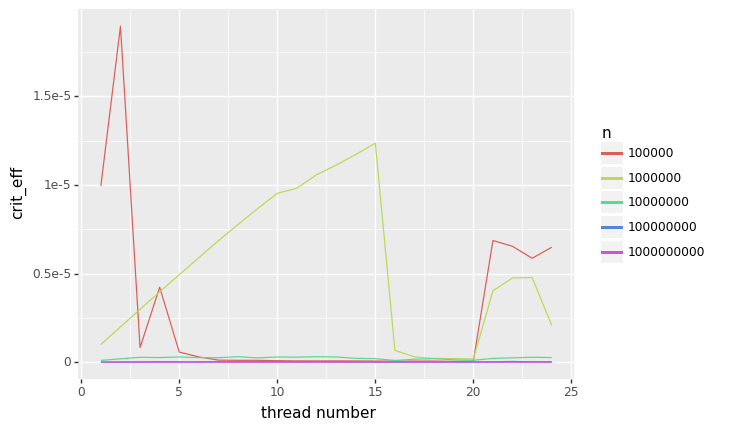

<ggplot: (721681541)>

In [212]:
df2 = df2.astype({"n": str})
ggplot(df2, aes(x="thread number", y="crit_eff", color="n")) + geom_line()

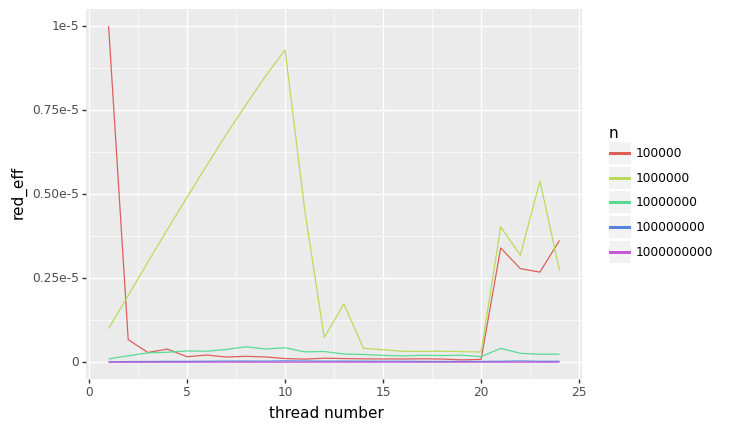

<ggplot: (721674436)>

In [213]:
ggplot(df2, aes(x="thread number", y="red_eff", color="n")) + geom_line()

In [214]:
import numpy as np
x = np.array([0,1,2,3])  # 128, 512, 2048, 4094
s_pixel =     np.array([33.6227, 33.5107, 33.4673, 33.4702])
s_iteration = np.array([0.00494716, 0.00494848, 0.0049421, 0.00494263])
s_iter_ps =   np.array([2.02136e08, 2.02082e08, 2.02343e08, 2.02321e08])
s_mflops =    np.array([1617.09, 1616.66, 1618.75,1618.57])

p_pixel =     np.array([6.7132, 4.28427, 3.374, 3.43162])
p_iteration = np.array([0.000980666, 0.000631424, 0.00049799, 0.000506631])
p_iter_ps =   np.array([1.01972e09,1.58372e09, 2.00807e09, 1.97382e09])
p_mflops =    np.array([8157.72, 12669.8, 16064.6, 15790.6])

In [215]:
import matplotlib.pyplot as plt

def plot(a, b, name):
    plt.plot(x, a, label="sequential")
    plt.plot(x, b, label="parallel")
    plt.title(name)
    plt.legend()
    plt.xlabel("Num pixels")
    plt.ylabel(name)
    plt.savefig(name + ".png")
    plt.show()

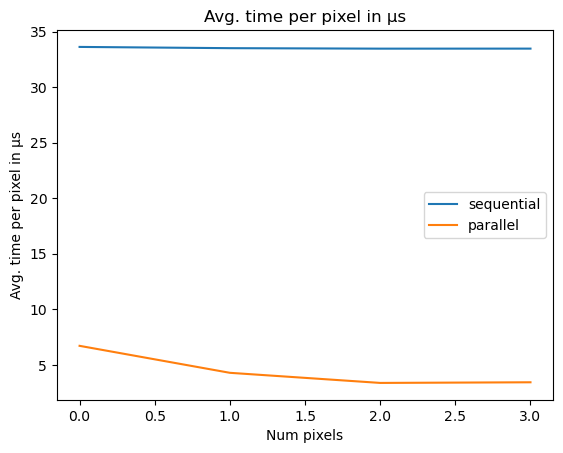

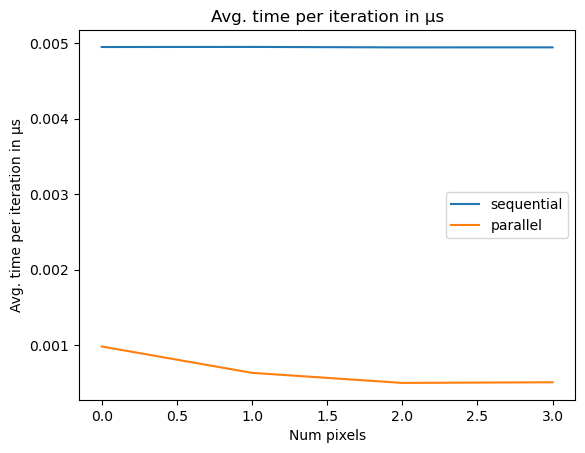

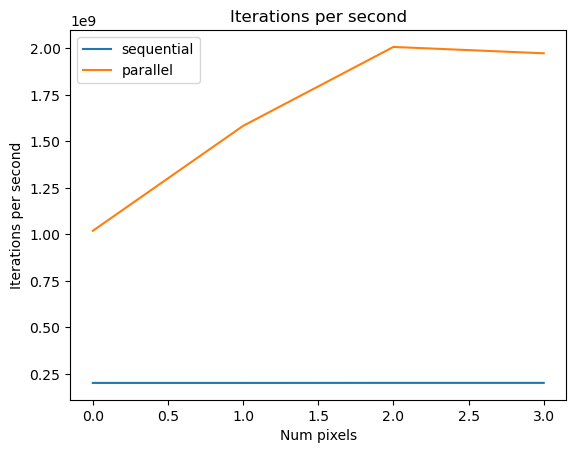

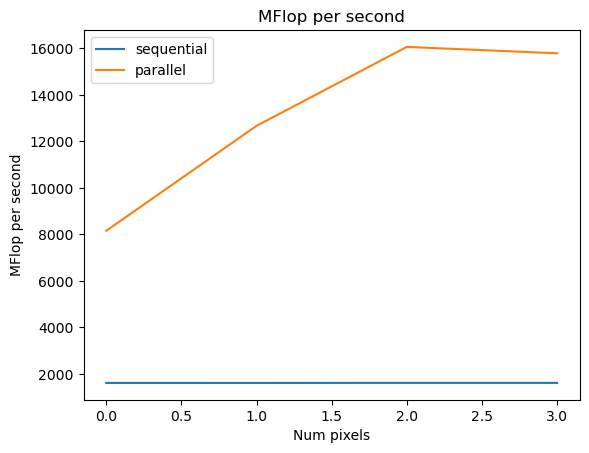

In [216]:
plot(s_pixel, p_pixel, "Avg. time per pixel in μs")
plot(s_iteration, p_iteration, "Avg. time per iteration in μs")
plot(s_iter_ps, p_iter_ps, "Iterations per second")
plot(s_mflops, p_mflops, "MFlop per second")

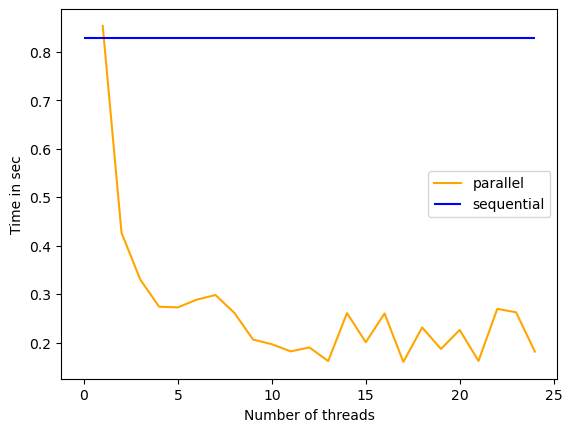

(0.160014, 16)

In [217]:
arr = np.array([0.853107, 0.426471, 0.329703, 0.273886, 0.27253, 0.288406, 0.298042, 0.261456, 0.206216, 0.196521,0.181864,0.18986,0.161795,0.260728,0.200645,0.259997,0.160014,0.231173,0.186764,0.225958,0.162046,0.269482,0.262404,0.181357])
plt.plot(range(1,25), arr, label="parallel", color="orange")
plt.hlines(0.827818, 0, 24, colors="b", label="sequential")
plt.xlabel("Number of threads")
plt.ylabel("Time in sec")
plt.legend(loc="center right")
plt.savefig("dist.png")
plt.show()
arr.min(), arr.argmin()